#  <p style="text-align: center;">    Intro to Machine Learning and a way of forecasting Bitcoin prices </p>

# What is machine learning, and how does it work?


## Agenda

- What is machine learning?
- What are the two main categories of machine learning?
- What are some examples of machine learning?
- How does machine learning "work"?

## What is machine learning?

One definition: "Machine learning is the semi-automated extraction of knowledge from data"

- **Knowledge from data**: Starts with a question that might be answerable using data
- **Automated extraction**: A computer provides the insight
- **Semi-automated**: Requires many smart decisions by a human

## What are the two main categories of machine learning?

**Supervised learning**: Making predictions using data
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict

**Unsupervised learning**: Extracting structure from data

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"

## How does machine learning "work"?

High-level steps of supervised learning:

1. First, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

2. Then, make **predictions** on **new data** for which the label is unknown

The primary goal of supervised learning is to build a model that "generalizes": It accurately predicts the **future** rather than the **past**!

## Questions about machine learning

- How do I choose **which attributes** of my data to include in the model?
- How do I choose **which model** to use?
- How do I **optimize** this model for best performance?
- How do I ensure that I'm building a model that will **generalize** to unseen data?
- Can I **estimate** how well my model is likely to perform on unseen data?

# About ...

## ... the dataset

CSV files for select bitcoin exchanges for the time period of Apr 2013 to Feb 2018 for the first one and Feb 2010 to Feb 2018, with day to day updates of OHLCVM (Open, High, Low, Close, Volume, Market Cap) for the first one and day to day updates of (*Prepare yourself.It's a long one*):

*btc_market_price, btc_total_bitcoins, btc_market_cap,btc_trade_volume, btc_blocks_size, btc_avg_block_size, btc_n_orphaned_blocks, btc_n_transactions_per_block, btc_median_confirmation_time, btc_hash_rate, btc_difficulty, btc_miners_revenue, btc_transaction_fees, btc_cost_per_transaction_percent, btc_cost_per_transaction, btc_n_unique_addresses, btc_n_transactions, btc_n_transactions, btc_n_transactions_excluding_popular, btc_n_transactions_excluding_chains_longer_than_100, btc_output_volume, btc_estimated_transaction_volume, btc_estimated_transaction_volume_usd.*

Timestamps are in Unix time. All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.

## ...the setup and virtual environments

In [1]:
#!/usr/bin/env bash

set -e
set -o xtrace
DEBIAN_FRONTEND=noninteractive
sudo apt-get autoclean 
sudo apt-get clean
sudo apt-get update
sudo apt install unzip -y
sudo apt -y autoremove
sudo ufw allow 8888:8898/tcp
wget https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
bash Anaconda3-5.1.0-Linux-x86_64.sh -b -u

cd
echo 'export PATH=~/anaconda3/bin:$PATH' >> ~/.bashrc
export PATH=~/anaconda3/bin:$PATH
source ~/.bashrc
DIR="$( cd "$( dirname "${BASH_SOURCE[0]}" )" && pwd )"
conda env create -f ${DIR%%/}/acLabs/environment.yml
echo 'source activate aclabsEnv' >> ~/.bashrc
source activate acLabsEnv
source ~/.bashrc
jupyter notebook --generate-config
echo "c.NotebookApp.ip = '*'" >> ~/.jupyter/jupyter_notebook_config.py
echo "c.NotebookApp.open_browser = False" >> ~/.jupyter/jupyter_notebook_config.py
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension --sys-prefix
pip install seaborn python-dateutil dask pytagcloud pyyaml 
pip install opencv-python numpy scipy scikit-learn
conda install h5py
echo
echo ---
echo - YOU NEED TO REBOOT YOUR COMPUTER NOW
echo ---

SyntaxError: invalid syntax (<ipython-input-1-c1448270ecfd>, line 4)

## ...pandas

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages, and makes importing and analyzing data much easier. Pandas builds on packages like NumPy and matplotlib to give you a single, convenient, place to do most of your data analysis and visualization work.

Pandas is capable of many tasks including:
* Reading/writing many different data formats
* Selecting subsets of data
* Calculating across rows and down columns
* Finding and filling missing data
* Applying operations to independent groups within the data
* Reshaping data into different forms
* Combing multiple datasets together
* Advanced time-series functionality
* Visualization through matplotlib and seaborn

###  <p style="text-align: center;">   Data Science pipeline </p>

![Data Science pipeline](data_science_pipeline.png)

## ...Scikit-Learn

### Outline

* Scikit-Learn and the scientific ecosystem in Python
* Classification
* Model evaluation and selection
* Transformers, pipelines and feature unions
* Beyond building classifiers
* Summary

### Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__

### Community driven development

- 20~ core developers (mostly researchers)
- 500-1000 occasional contributors
- __All working publicly together__ on [GitHub](https://github.com/scikit-learn/scikit-learn)
- Emphasis on __keeping the project maintainable__
    - Style consistency
    - Unit-test coverage
    - Documentation and examples
    - Code review
- Mature and stable

In [3]:
# Machine Learning regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
# By including this line you won't need to call plt.show() every time
%matplotlib inline
import seaborn as sns
from bokeh.plotting import figure, output_file, output_notebook, show

## Data quality check

Before going to the point where we train Machine Learning algorithms, we need to have a very good understanding of the dataset we're using and see if we can find interesting attributes that we can use when training an ML algorithm.

We should ask ourselfs questions like:
* What does our data look like?
* Do we have clean up issues ?
* Is our dataset big enough ?

## Loading the dataset

To start exploring your data, you’ll need to start by actually loading in your data and one posibility to do that is by using the Pandas library mentioned before.

There are a bunch arguments that you can specify to ensure that your data is read in correctly: you can specify the delimiter to use with the **sep** or **delimiter** arguments, the column names to use with **names** or the column to use as the row labels for the resulting DataFrame with **index_col**.

But these are not nearly all the arguments that you can add to the read_csv() function. Read up on this function and its arguments in the [Pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.23/index.html).

### Pandas Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [10]:
s = pd.Series(np.random.randn(3), index=['a','b','c'])
s

a   -0.614179
b    0.061170
c   -0.353353
dtype: float64

### Pandas DataFrames

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index

In [13]:
df = pd.DataFrame(pd.Series(np.random.randn(3), index=['a','b','c']), pd.Series(np.random.randn(3), index=['a','b','c']))
df

,0
1.013493,NaN
-0.637999,NaN
1.208778,NaN


### Back to the dataset

In [14]:
# Read in data for "bitcoin_price" dataset
bitcoin_price = pd.read_csv('bitcoin_price.csv',parse_dates=['Date'])

The **head** function returns the first n rows, where you can specify the number of rows to show (by default, n=5). 

In [20]:
#bitcoin_price.head(8)
bitcoin_price.tail(6)

,Date,Open,High,Low,Close,Volume,Market Cap
1754,2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
1755,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1756,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1757,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1758,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1759,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


You can use the **describe** function to get various summary statistics that exclude NaN values.It returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [22]:
#bitcoin_price.describe()
bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
Date          1760 non-null datetime64[ns]
Open          1760 non-null float64
High          1760 non-null float64
Low           1760 non-null float64
Close         1760 non-null float64
Volume        1760 non-null object
Market Cap    1760 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 96.3+ KB


## Checking for missing values

Checking this is important because when some of your data is missing, the data set can lose expressiveness, which can lead to weak or biased analyses. Practically, this means that when you’re missing values for certain features, the chances of your classification or predictions for the data being off only increase.

To identify the rows that contain missing values, you can use the **isnull** method. In the result that you’ll get back, you’ll see **True** or **False** appearing in each cell: **True** will indicate that the value contained within the cell is a missing value, **False** means that the cell contains a ‘normal’ value.

In [35]:
pd.isnull(bitcoin_price.loc["2018-02-17":"2018-02-11",:])

,Date,Open,High,Low,Close,Volume,Market Cap


Let's take another look at the first rows. What's wrong ?

In [36]:
bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1759,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1758,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1757,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1756,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1755,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [41]:
# Sort the dates into proper order
bitcoin_price = bitcoin_price[::-1]

bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


So now we've got our samples in chronological order but again something's not right.

In [46]:
# Reset index for bitcoin_price manually 
bitcoin_price.index = range(len(bitcoin_price))

# Reset index for bitcoin_price using the built-in method
bitcoin_price.reset_index();

bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


As our first dataset is looking pretty decent now, we're going to go through a similar process for the second file that contains Bitcoin data.

In [47]:
# Read in data from "bitcoin_dataset" dataset
bitcoin_dataset = pd.read_csv('bitcoin_dataset.csv',parse_dates=['Date'])
bitcoin_dataset.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


Now that we've loaded our data and cleaned it up a bit, we're left with 2 dataset (2 DataFrames actually). 

To take full advantage of the Bitcoin insights that they provide we have the posibility to merge them so the algorithm that we're going to train will benefit from all the features.

Merge DataFrame objects is done by performing a database-style join operation by columns or indexes.

One thing we need to do before the actual **merge** is to make sure that we will combine DataFrames with the same length (We just cleaned our data so we don't want to get nasty NaN values).

In [48]:
# Make bitcoin_price and bitcoin_dataset the same length
equal_length = len(bitcoin_dataset) - len(bitcoin_price)
bitcoin_dataset = bitcoin_dataset[['btc_estimated_transaction_volume_usd','btc_total_bitcoins','btc_avg_block_size']][equal_length:]

# Reset index for bitcoin_dataset as we did for bitcoin_price
bitcoin_dataset.index = range(len(bitcoin_dataset))

# 'Volume' and 'Market Cap' don't seem too interesting so will drop those columns
bitcoin_price = bitcoin_price[['Date','Close','Open','High','Low']]

# Merge bitcoin_price and bitcoin_dataset
df = pd.merge(bitcoin_price,bitcoin_dataset, left_index = True, right_index = True)
df.head()

,Date,Close,Open,High,Low,btc_estimated_transaction_volume_usd,btc_total_bitcoins,btc_avg_block_size
0,2018-02-20,11403.7,11231.8,11958.5,11231.80,22605050.0,11090225.0,0.126539
1,2018-02-19,11225.3,10552.6,11273.8,10513.20,41199388.0,11094750.0,0.140126
2,2018-02-18,10551.8,11123.4,11349.8,10326.00,32294820.0,11098475.0,0.185539
3,2018-02-17,11112.7,10207.5,11139.5,10149.40,32988744.0,11102000.0,0.167730
4,2018-02-16,10233.9,10135.7,10324.1,9824.82,33019004.0,11105600.0,0.189949


# Data Visualisation

Remember the old joke about the similarity between an engineer and a dog? (They both know a lot, but can't express it well.)

The same thing happens with data; you can have the perfect, complete dataset, but if you're not able to tell the story behind the numbers, to uncover patterns and correlations, there's no use.

In [49]:
# We have here bitcoin's closing price and we want to visualise how it changed over time
df_close = df[['Date','Close']]
df_close = df_close.set_index('Date')

There are a number of libraries out there that can help you get started with visualising data; let's take a look at three of the most used.

### Matplotlib

Easiest, straightforward solution.

Text(0,0.5,'Price in USD')

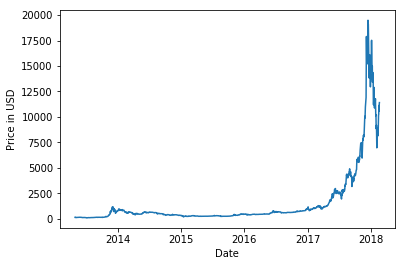

In [50]:
# Choosing to visualise as a line plot
plt.plot(df_close)
plt.xlabel('Date')
plt.ylabel('Price in USD')

### Seaborn

Can be used as a styling library on top of matplotlib, but it can also leverage your data science & statistics features.

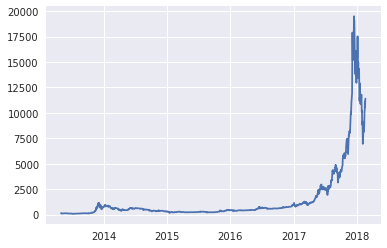

In [55]:
# Adding styles
sns.set(style="darkgrid")
plt.plot(df_close)

### Bokeh

Brings an interactive feature to your visualisation; you can zoom, pan, embed, export static images and many more.

In [56]:
from datetime import datetime as dt
import time
from bokeh.models import Span

# Date index is handled by the lib itself
df_close_no_index = df[['Date','Close']]

# Output plot in html format
#output_file("bitcoin_price_chart.html")
output_notebook()

Loading BokehJS ...

In [53]:
# Creating a plot with x-axis as datetime type
p = figure(plot_width=800, plot_height=600, x_axis_type="datetime")
p.line(df_close_no_index['Date'], df_close_no_index['Close'], color='cornflowerblue', line_width= 3, alpha=1)
legal_tender_Japan = Span(location=time.mktime(dt(2017, 4, 1, 0, 0, 0).timetuple())*1000,
                              dimension='height', line_color='grey',
                              line_dash='dashed', line_width=1)
p.add_layout(legal_tender_Japan)
show(p)

### Is there more?

What should you track and which graph type should you choose?
* to **compare values**: column, mekko, bar, pie, line, scatter plot, bullet
* to show **composition**: pie, stacked bar, mekko, stacked column, area, waterfall
* to understand **distribution**: scatter plot, mekko, line, column, bar
* to find **trends**: line, dual-axis line, column
* to show **relationships** between value sets: scatter plot, bubble, line

Looking into our bitcoin price dataset, we have all the info needed to visualise a well-known financial chart called **Candlestick**: combines line and a bar charts, each bar representing important pieces of information for that day: the open, the close, the high and the low.

In [57]:
# Output plot in html format
#output_file("bitcoin_price_candlechart.html")

inc = bitcoin_price['Close'] > bitcoin_price['Open']
dec = bitcoin_price['Open'] > bitcoin_price['Close']
w = 12*60*60*1000 # half day in ms
candle = figure(plot_width=800, plot_height=600, x_axis_type="datetime")
# x0, y0, x1, y1
candle.segment(bitcoin_price['Date'], bitcoin_price['High'], bitcoin_price['Date'], bitcoin_price['Low'], color="blue")
# center, width, top, bottom
candle.vbar(bitcoin_price['Date'][inc], w, bitcoin_price['Open'][inc], bitcoin_price['Close'][inc], fill_color="#D5E1DD", line_color="black")
candle.vbar(bitcoin_price['Date'][dec], w, bitcoin_price['Open'][dec], bitcoin_price['Close'][dec], fill_color="#F2583E", line_color="black")
show(candle)

# Data preprocessing

Data preprocessing aims at making the raw data at hand more amenable to the algorithms you'll use . This includes scaling, normalization, handling missing values,standardization or enconding.

### Data scaling

* When our data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.

* It's useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent.

* It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors.

* There are a bunch of tools available that can help with scaling e.g. MinMaxScale and preprocessing module in Scikit-Learn

In [62]:
import datetime as dt
Y = df['Close']

X = df.drop('Close', 1)
df_close.head()
df.head()


,Date,Close,Open,High,Low,btc_estimated_transaction_volume_usd,btc_total_bitcoins,btc_avg_block_size
0,2018-02-20,11403.7,11231.8,11958.5,11231.80,22605050.0,11090225.0,0.126539
1,2018-02-19,11225.3,10552.6,11273.8,10513.20,41199388.0,11094750.0,0.140126
2,2018-02-18,10551.8,11123.4,11349.8,10326.00,32294820.0,11098475.0,0.185539
3,2018-02-17,11112.7,10207.5,11139.5,10149.40,32988744.0,11102000.0,0.167730
4,2018-02-16,10233.9,10135.7,10324.1,9824.82,33019004.0,11105600.0,0.189949


In [63]:
# center the data around 0 by scaling
from sklearn import preprocessing
X = preprocessing.scale(X)

TypeError: float() argument must be a string or a number, not 'Timestamp'

One thing we can do to avoid the above error is to extract individual properties from the date column and add them as features for our dataset

In [64]:
X['Date'] = pd.to_datetime(X['Date'])
X['year'] = X['Date'].apply(lambda x: x.year)
X['month'] = X['Date'].apply(lambda x: x.month)
X['day'] = X['Date'].apply(lambda x: x.day)

In [65]:
list(df.columns.values)

['Date',
 'Close',
 'Open',
 'High',
 'Low',
 'btc_estimated_transaction_volume_usd',
 'btc_total_bitcoins',
 'btc_avg_block_size']

In [66]:
X = X.reindex_axis(['day','month','year','Open','btc_estimated_transaction_volume_usd','btc_total_bitcoins','btc_avg_block_size'],axis=1)
X.head()


/home/svusers/anaconda3/envs/acLabsEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,day,month,year,Open,btc_estimated_transaction_volume_usd,btc_total_bitcoins,btc_avg_block_size
0,20,2,2018,11231.8,22605050.0,11090225.0,0.126539
1,19,2,2018,10552.6,41199388.0,11094750.0,0.140126
2,18,2,2018,11123.4,32294820.0,11098475.0,0.185539
3,17,2,2018,10207.5,32988744.0,11102000.0,0.167730
4,16,2,2018,10135.7,33019004.0,11105600.0,0.189949


In [67]:
X.dtypes

day                                       int64
month                                     int64
year                                      int64
Open                                    float64
btc_estimated_transaction_volume_usd    float64
btc_total_bitcoins                      float64
btc_avg_block_size                      float64
dtype: object

In [68]:
Y.head(3)

0    11403.7
1    11225.3
2    10551.8
Name: Close, dtype: float64

In [69]:
X = preprocessing.scale(X)
Y = preprocessing.scale(Y)
print(X[:3])
print('------------------------------------------------')
print(Y[:3])

[[ 0.48712747 -1.34568065  1.95533389  3.3062664  -0.44951036 -1.95180079
  -1.36535377]
 [ 0.37358697 -1.34568065  1.95533389  3.07599936 -0.42397111 -1.94917096
  -1.32274657]
 [ 0.26004646 -1.34568065  1.95533389  3.26951589 -0.4362015  -1.94700607
  -1.18033672]]
------------------------------------------------
[3.352444   3.29214164 3.06448669]


# Training, validation and test sets

In machine learning the goal is to achieve models that *generalize* i.e that perform well on unseen data and the main issue with this is something called overfiting. You can only control that which you can observe, so it's crucial to be able to measure the generalization power of your model.

So taking the above in account it's pretty obvious that you need to split your dataset in at least 2 parts:
* a **training set** which you'll use to train your model and find optimal parameters
* a **test set** which you'll use to test your model and see how it generalises 
* a **validation set** which you'll to improve your model configuration aka tuning the models **hyperparameters**

The general rule is to start with a 80%-20% split (%80 training set - 20% test set) and a second split to create the validation set.

## Things to keep in mind

* You want both your training set and test set to be representative of the data at hand. For instance, if you’re trying to classify images of digits, and you’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as your training set and the remaining 20% as your test set will result in your training set containing only classes 0–7, whereas your test set contains only classes 8–9. This seems like a ridiculous mistake, but it’s surprisingly common. For this reason, you usually should randomly shuffle your data before splitting it into training and test sets.

* If you’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), you should not randomly shuffle your data before splitting it, because doing so will create a temporal leak: your model will effectively be trained on data from the future. In such situations, you should always make sure all data in your test set is posterior to the data in the training set.

* If some data points in your data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, you’ll be testing on part of your training data, which is the worst thing you can do! Make sure your training set and validation set are disjoint.

So it's time to do training and testing of dataset.We will import train_test_split method of sklearn to divide the dataset in train and test. Note that the test_size has been set to 30 percent whole dataset. One import thing we need to do, as we work with time series, is to set the shuffling to **False** so we won't lose the order as discussed earlier

In [70]:
from sklearn import model_selection
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X,Y,test_size=0.3,shuffle=False)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X_train,y_train,test_size=0.1,shuffle=False)

# Linear regression
**Pros**: fast, no tuning required, highly interpretable, well-understood

**Cons**: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

* $y$ is the response
* $\beta_0$ is the intercept
* $\beta_1$ is the coefficient for $x_1$ (the first feature)
* $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [71]:
clf = LinearRegression()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_validation)

Apart from visually analyzing the model, we can also do some analysis by calculating evaluation matrices. There are three type of evaluation matrices which are: Mean Absolute Error, Mean square Error, and Root Mean squared error. (to deeply get the knowledge of these matrices, you can learn the concepts in freely available statistical books). Note that all of these matrices are loss functions and we always want to minimize them.

* **Mean Average Error** : it is the easiest to understand because it is just the average error.
* **Mean Squared Error** : is more popular than MAE, because it punishes larger errors, which tends to be useful in the real world.
* **Root Mean Squared Error** : it is even more popular because it is interpretable in y-units



In [73]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_validation,y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_validation,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_validation,y_pred)))

Mean Squared Error:  0.04655749951841636
Mean Absolute Error:  0.1971572604560255
Root Mean Squared Error:  0.2157718691544761


In [74]:
print(clf.coef_)

[-0.0140161  -0.12902173 -0.66320438  0.97634706 -0.00955259 -0.5764947
 -0.00670365]


Text(0.5,1,'Testing Result Scaled')

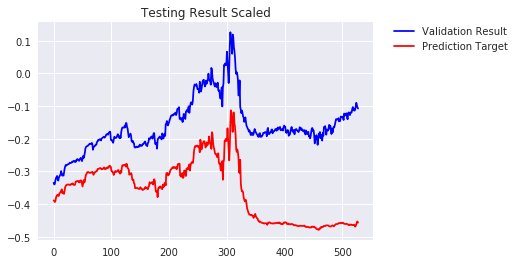

In [75]:
# Comparison of the expected and tested outputs scaled
plt.plot(y_pred,color='blue',label='Validation Result')
plt.plot(y_validation,color='red',label='Prediction Target')
plt.legend('test prediction', ncol=2, loc='upper left');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Testing Result Scaled')

In [78]:
y_predicted = clf.predict(X_test)

Text(0.5,1,'Testing Result Scaled')

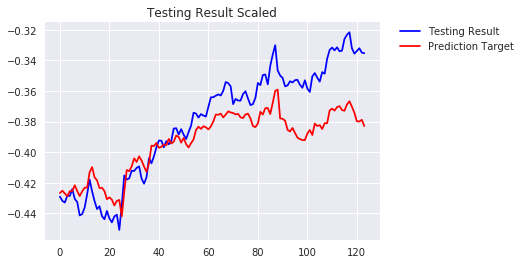

In [79]:
# Comparison of the expected and tested outputs scaled
plt.plot(y_predicted,color='blue',label='Testing Result')
plt.plot(y_test,color='red',label='Prediction Target')
plt.legend('test,prediction', ncol=2, loc='upper left');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Testing Result Scaled')

## Things to do next

* Try to improve the results by adding additional features

* Try to tune the model by playing with the parameters from [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* Try and fetch new data with this [API](https://blog.quandl.com/api-for-bitcoin-data) and go through a similar process